In [2]:
import scipy.io
import numpy as np
from utils import load_files, get_rdms, get_rdm, get_spearmanr, inter_intra_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import imageio
from sklearn.manifold import MDS
import torch
%load_ext autoreload
%autoreload 2

In [1]:
#%store -r df_only_most_rel
%store -r df

In [3]:
embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=39)
arr = df_only_most_rel.to_numpy()

In [4]:
arr.shape
arr = 1 - arr

In [5]:
transformed = embedding.fit_transform(arr)

/Users/sebastian/miniforge3/envs/brain-cv/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [6]:
df_t = pd.DataFrame(transformed, columns=['x', 'y'])
df_t['Name'] = list(df_only_most_rel.index)
df_t['data'] = df_t['Name'].apply(lambda x: 'FMRI' if x in ['EVC', 'LOC', 'PFS', 'OPA', 'PPA', 'RSC'] else ' '.join(word for word in x.split() if not any(char.isdigit() for char in word)))

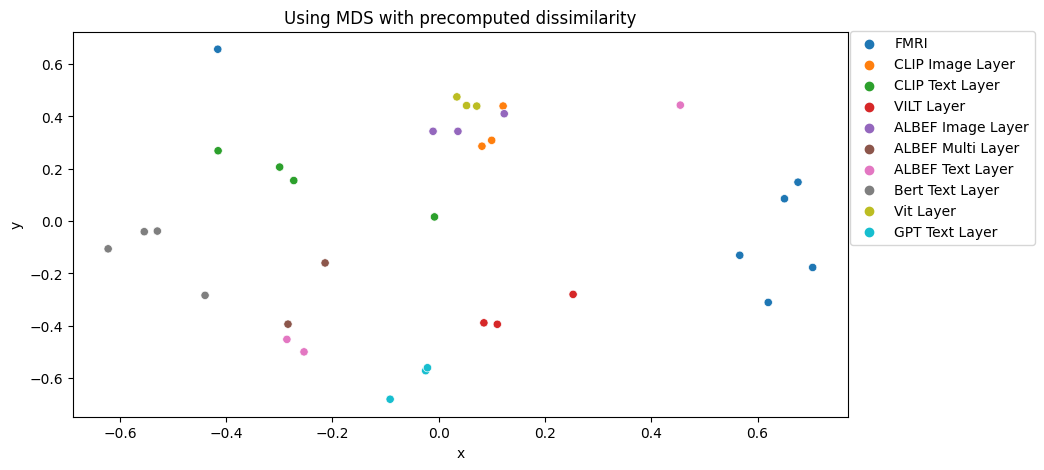

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='x', y='y', data=df_t, hue='data')
plt.title('Using MDS with precomputed dissimilarity')
handles, labels = plt.gca().get_legend_handles_labels()
legend = plt.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.25, 1.02))
plt.show()

In [8]:
# Now the same with every layer

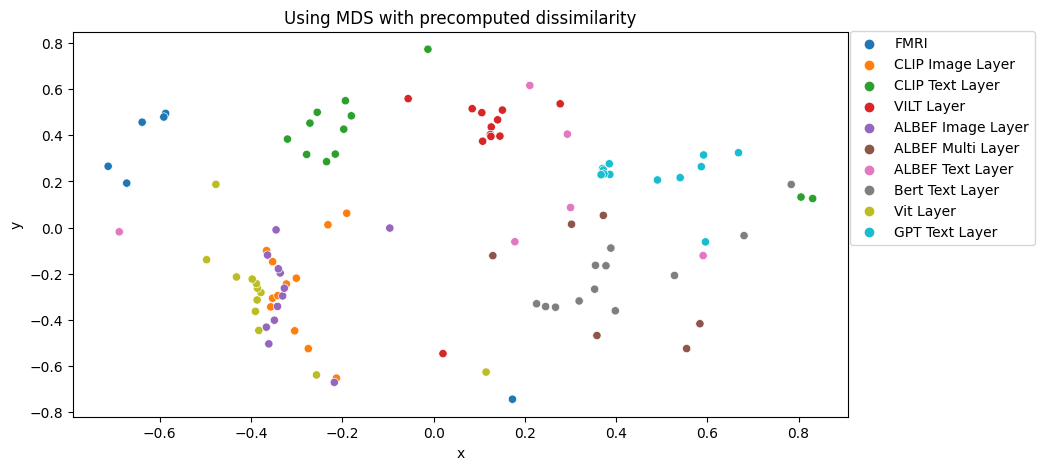

In [9]:
embedding = MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto', random_state=42)
arr = df.to_numpy()
arr = 1 - arr
transformed = embedding.fit_transform(arr)
df_t = pd.DataFrame(transformed, columns=['x', 'y'])
df_t['Name'] = list(df.index)
df_t['data'] = df_t['Name'].apply(lambda x: 'FMRI' if x in ['EVC', 'LOC', 'PFS', 'OPA', 'PPA', 'RSC'] else ' '.join(word for word in x.split() if not any(char.isdigit() for char in word)))
plt.figure(figsize=(10, 5))
sns.scatterplot(x='x', y='y', data=df_t, hue='data')
plt.title('Using MDS with precomputed dissimilarity')
handles, labels = plt.gca().get_legend_handles_labels()
legend = plt.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.25, 1.02))
plt.show()

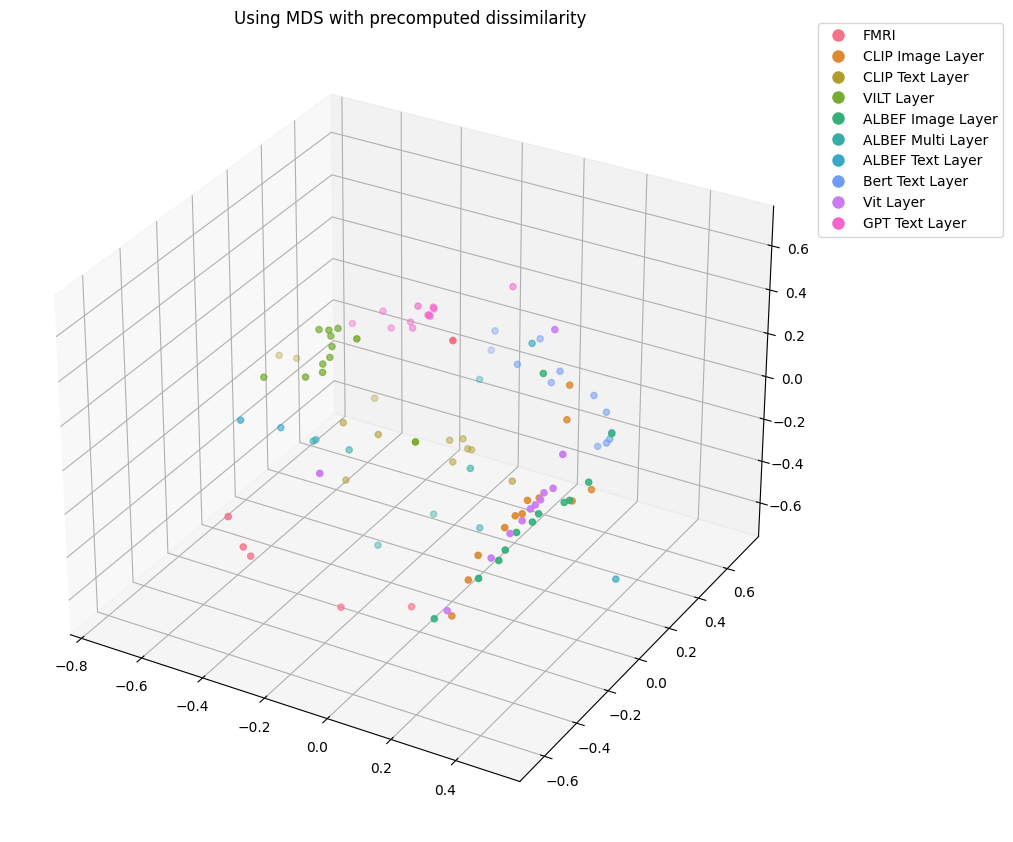

In [24]:
embedding = MDS(n_components=3, dissimilarity='precomputed', normalized_stress='auto', random_state=42)

arr = df.to_numpy()
arr = 1 - arr

transformed = embedding.fit_transform(arr)

df_t = pd.DataFrame(transformed, columns=['x', 'y', 'z'])
df_t['Name'] = list(df.index)
df_t['data'] = df_t['Name'].apply(lambda x: 'FMRI' if x in ['EVC', 'LOC', 'PFS', 'OPA', 'PPA', 'RSC'] else ' '.join(word for word in x.split() if not any(char.isdigit() for char in word)))

distinct_values = df_t['data'].unique()

# Create a color palette using Seaborn with enough distinct colors
n_colors = len(distinct_values)
cmap = ListedColormap(sns.color_palette("husl", n_colors).as_hex())

# Create a dictionary to map categories to colormap indices
color_mapping = {val: cmap(i) for i, val in enumerate(distinct_values)}

# Map category names to colormap colors
df_t['color'] = df_t['data'].map(color_mapping)

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
scatter = ax.scatter(df_t['x'], df_t['y'], df_t['z'], c=df_t['color'], marker='o')
plt.title('Using MDS with precomputed dissimilarity')

# Create a legend for the color mapping
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[val], markersize=10, label=val) for val in distinct_values]
plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.show()



{'FMRI': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 'CLIP Image Layer': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0), 'CLIP Text Layer': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 'ALBEF Image Layer': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0), 'ALBEF Text Layer': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), 'ALBEF Multi Layer': (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0), 'VILT Layer': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 'Bert Text Layer': (1.0, 0.596078431372549, 0.5882352941176471, 1.0), 'GPT Text Layer': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), 'Vit Layer': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0)}


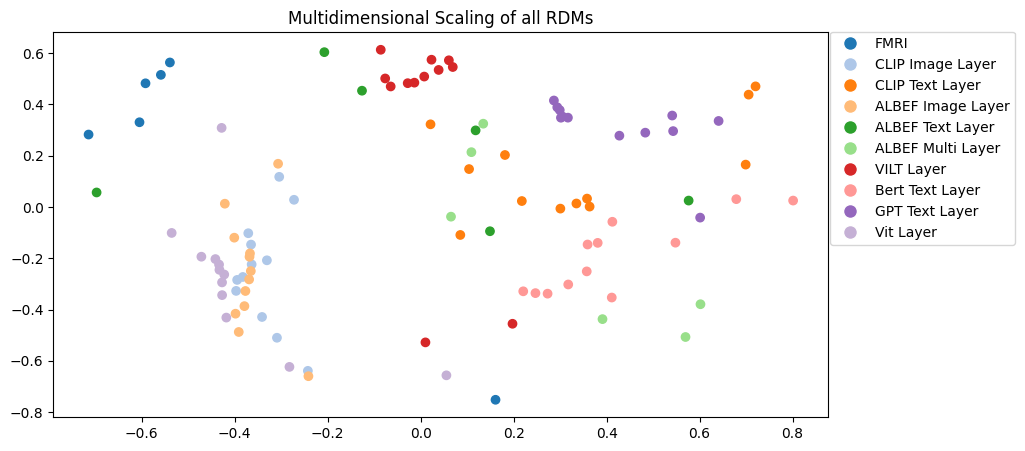

In [36]:


embedding = MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto', random_state=42)

arr = df.to_numpy()
arr = 1 - arr

transformed = embedding.fit_transform(arr)

df_t = pd.DataFrame(transformed, columns=['x', 'y'])
df_t['Name'] = list(df.index)
df_t['data'] = df_t['Name'].apply(lambda x: 'FMRI' if x in ['EVC', 'LOC', 'PFS', 'OPA', 'PPA', 'RSC'] else ' '.join(word for word in x.split() if not any(char.isdigit() for char in word)))

distinct_values = ['FMRI', 'CLIP Image Layer', 'CLIP Text Layer', 'ALBEF Image Layer',
       'ALBEF Text Layer', 'ALBEF Multi Layer', 'VILT Layer',
       'Bert Text Layer', 'GPT Text Layer', 'Vit Layer']

# Create a color palette using Seaborn with enough distinct colors
n_colors = len(distinct_values)
cmap = ListedColormap(sns.color_palette("tab20", n_colors=n_colors).as_hex())

# Create a dictionary to map categories to colormap indices
color_mapping = {'FMRI': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 'CLIP Image Layer': (0.6823529411764706,
  0.7803921568627451,
  0.9098039215686274,
  1.0),
 'CLIP Text Layer': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'ALBEF Image Layer': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 'ALBEF Text Layer': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313,
  1.0),
 'ALBEF Multi Layer': (0.596078431372549,
  0.8745098039215686,
  0.5411764705882353,
  1.0),
 'VILT Layer': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392,
  1.0),
 'Bert Text Layer': (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 'GPT Text Layer': (0.5803921568627451,
  0.403921568627451,
  0.7411764705882353,
  1.0),
 'Vit Layer': (0.7725490196078432,
  0.6901960784313725,
  0.8352941176470589,
  1.0)}

# Map category names to colormap colors
df_t['color'] = df_t['data'].map(color_mapping)
print(color_mapping)
plt.figure(figsize=(10, 5))

scatter = plt.scatter(df_t['x'], df_t['y'], c=df_t['color'], marker='o')
plt.title('Multidimensional Scaling of all RDMs')

# Create a legend for the color mapping
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[val], markersize=10, label=val) for val in distinct_values]
plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.show()


In [30]:
df

,EVC,LOC,PFS,OPA,PPA,RSC,CLIP Image Layer 1,CLIP Image Layer 2,CLIP Image Layer 3,CLIP Image Layer 4,...,GPT Text Layer 3,GPT Text Layer 4,GPT Text Layer 5,GPT Text Layer 6,GPT Text Layer 7,GPT Text Layer 8,GPT Text Layer 9,GPT Text Layer 10,GPT Text Layer 11,GPT Text Layer 12
EVC,1.000000,0.056105,0.056350,0.077939,0.067918,0.089977,0.072754,0.139191,0.089981,0.090788,...,0.036192,-0.014685,0.031129,0.037961,0.030096,0.038961,0.040433,0.039410,0.036145,0.037608
LOC,0.056105,1.000000,0.604765,0.085869,0.072959,0.037536,0.040605,0.092374,0.144662,0.166525,...,0.046644,0.016579,0.036167,0.037130,0.038184,0.041115,0.044164,0.044030,0.046420,0.049125
PFS,0.056350,0.604765,1.000000,0.159166,0.204689,0.151539,0.037190,0.077983,0.170662,0.214389,...,0.079606,0.038914,0.034872,0.056928,0.065825,0.071359,0.081137,0.080540,0.082369,0.084878
OPA,0.077939,0.085869,0.159166,1.000000,0.770890,0.462588,0.032780,0.053394,0.113371,0.112536,...,0.021812,0.005124,0.010626,0.031172,0.017878,0.020896,0.019254,0.015996,0.020215,0.023061
PPA,0.067918,0.072959,0.204689,0.770890,1.000000,0.655500,0.041423,0.057435,0.130725,0.152503,...,0.025113,0.006258,0.006723,0.036854,0.022771,0.020326,0.021032,0.018269,0.024750,0.026021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GPT Text Layer 8,0.038961,0.041115,0.071359,0.020896,0.020326,0.022295,0.044522,0.087915,0.332937,0.255824,...,0.899438,0.451957,0.525333,0.633215,0.739166,1.000000,0.942154,0.935014,0.900732,0.905239
GPT Text Layer 9,0.040433,0.044164,0.081137,0.019254,0.021032,0.022467,0.033490,0.078380,0.385515,0.307945,...,0.949646,0.457066,0.518352,0.632381,0.721685,0.942154,1.000000,0.996421,0.961550,0.961904
GPT Text Layer 10,0.039410,0.044030,0.080540,0.015996,0.018269,0.020258,0.041048,0.084442,0.385630,0.309079,...,0.957208,0.462823,0.541396,0.648532,0.738608,0.935014,0.996421,1.000000,0.968819,0.967629
GPT Text Layer 11,0.036145,0.046420,0.082369,0.020215,0.024750,0.024092,0.062121,0.094833,0.363487,0.299830,...,0.987935,0.490388,0.569219,0.670888,0.759959,0.900732,0.961550,0.968819,1.000000,0.996013


In [35]:
distinct_values

array(['FMRI', 'CLIP Image Layer', 'CLIP Text Layer', 'VILT Layer',
       'ALBEF Image Layer', 'ALBEF Multi Layer', 'ALBEF Text Layer',
       'Bert Text Layer', 'Vit Layer', 'GPT Text Layer'], dtype=object)